<a href="https://colab.research.google.com/github/shekar9801/Deep-Learning-with-Pytorch/blob/main/simple_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [17]:
class Model(nn.Module):
  def __init__(self, in_feature=4, h1=8, h2=9, out_feature=3):
    super().__init__()
    self.fc1 = nn.Linear(in_feature, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_feature)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x


In [18]:
model = Model()

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
data = pd.read_csv(url)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [21]:
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [22]:
data['species'] = data['species'].map({'setosa':0, 'versicolor':1, 'virginica':2})
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
from sklearn.model_selection import train_test_split

X = data.drop('species', axis=1).values
y = data['species'].values

# X = X.values
# y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [24]:
torch.manual_seed(33)
model = Model()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 100
losses = []

for i in range(epochs):
  y_pred = model.forward(X_train)
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())

  if i%10 == 0:
    print(f'Epoch: {i} Loss: {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()




Epoch: 0 Loss: 1.1880278587341309
Epoch: 10 Loss: 1.0545216798782349
Epoch: 20 Loss: 0.9283751845359802
Epoch: 30 Loss: 0.656653106212616
Epoch: 40 Loss: 0.4490240812301636
Epoch: 50 Loss: 0.32752886414527893
Epoch: 60 Loss: 0.21238763630390167
Epoch: 70 Loss: 0.12857429683208466
Epoch: 80 Loss: 0.08929705619812012
Epoch: 90 Loss: 0.07297828048467636


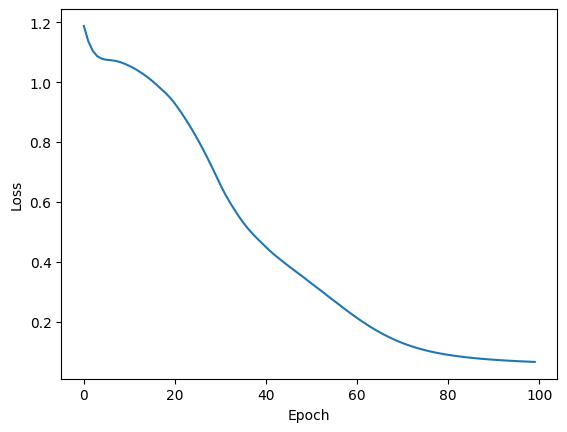

In [25]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [26]:
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)
    loss = criterion(y_val, y_test[i])
    y_val = y_val.argmax().item()

    if y_test[i]==0:
      x = 'setosa'
    elif y_test[i]==1:
      x = 'versicolor'
    else:
      x = 'virginica'

    print(f'{i+1:2}. predicted {str(y_val):2} actual {y_test[i]:2} {x}')


 1. predicted 1  actual  1 versicolor
 2. predicted 1  actual  1 versicolor
 3. predicted 0  actual  0 setosa
 4. predicted 1  actual  1 versicolor
 5. predicted 2  actual  2 virginica
 6. predicted 2  actual  2 virginica
 7. predicted 0  actual  0 setosa
 8. predicted 0  actual  0 setosa
 9. predicted 2  actual  2 virginica
10. predicted 2  actual  2 virginica
11. predicted 2  actual  2 virginica
12. predicted 0  actual  0 setosa
13. predicted 2  actual  2 virginica
14. predicted 1  actual  1 versicolor
15. predicted 2  actual  2 virginica
16. predicted 1  actual  1 versicolor
17. predicted 1  actual  2 virginica
18. predicted 0  actual  0 setosa
19. predicted 1  actual  1 versicolor
20. predicted 2  actual  2 virginica
21. predicted 0  actual  0 setosa
22. predicted 0  actual  0 setosa
23. predicted 2  actual  2 virginica
24. predicted 0  actual  0 setosa
25. predicted 2  actual  2 virginica
26. predicted 2  actual  2 virginica
27. predicted 1  actual  1 versicolor
28. predicted 1  a

In [41]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np


class CustomCrossEntropyLoss(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, logits, target):

        logits = logits - logits.max(dim=1, keepdim=True).values

        exp_logits = torch.exp(logits)
        probs = exp_logits / exp_logits.sum(dim=1, keepdim=True)

        batch_indices = torch.arange(logits.size(0), device=logits.device)
        correct_class_probs = probs[batch_indices, target]

        loss = -torch.log(correct_class_probs).mean()
        return loss


class CustomReLU(nn.Module):
  def forward(self, x):
    return torch.where(x > 0, x, torch.tensor(0.0, device=x.device))


class CustomLinear(nn.Module):
  def __init__(self, input_feature, output_feature, bias=True):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(input_feature, output_feature))
    self.bias = nn.Parameter(torch.zeros(output_feature))

  def forward(self, x):
    return x @ self.weight + self.bias


class Model(nn.Module):
    def __init__(self, in_feature=4, hidden1=8, hidden2=9, hidden3=10,  out_feature=3):
        super().__init__()
        self.layer1 = CustomLinear(in_feature, hidden1)
        self.layer2 = CustomLinear(hidden1, hidden2)
        self.layer3 = CustomLinear(hidden2, hidden3)
        self.out = CustomLinear(hidden3, out_feature)
        self.Relu = CustomReLU()

    def forward(self, x):
        x = self.Relu(self.layer1(x))
        x = self.Relu(self.layer2(x))
        x = self.Relu(self.layer3(x))
        x = self.out(x)
        return x


torch.manual_seed(20)
model = Model()
print(model)

url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
data = pd.read_csv(url)

data['species'] = pd.Categorical(data['species']).codes
print(data.head())


X = data.drop('species', axis=1).values
y = data['species'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


epcohs = 100
# criterion = nn.CrossEntropyLoss()
criterion = CustomCrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=0.01)
losses = []
model_accuracy = []

for epoch in range(epcohs):
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    predicted_classes = torch.argmax(y_pred, dim=1).detach().cpu().numpy()
    true_labels = y_train.detach().cpu().numpy()
    accuracy = accuracy_score(predicted_classes, true_labels)
    model_accuracy.append(accuracy)
    losses.append(loss.detach().cpu().numpy())

    if epoch % 5 == 0:
        print(f'{epoch:2} loss {loss:.4f} accuracy {accuracy:.2f}%')


Model(
  (layer1): CustomLinear()
  (layer2): CustomLinear()
  (layer3): CustomLinear()
  (out): CustomLinear()
  (Relu): CustomReLU()
)
   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0
 0 loss 40.6535 accuracy 0.35%
 5 loss 13.7021 accuracy 0.35%
10 loss 1.4824 accuracy 0.62%
15 loss 0.8332 accuracy 0.60%
20 loss 0.3134 accuracy 0.84%
25 loss 0.3432 accuracy 0.85%
30 loss 0.1414 accuracy 0.93%
35 loss 0.1126 accuracy 0.98%
40 loss 0.1157 accuracy 0.97%
45 loss 0.0799 accuracy 0.99%
50 loss 0.0808 accuracy 0.98%
55 loss 0.0741 accuracy 0.97%
60 loss 0.0687 accuracy 0.98%
65 loss 0.0643 accuracy 0.99%
70 loss 0.0633 accuracy 0.99%
75 loss 0.0614 accura

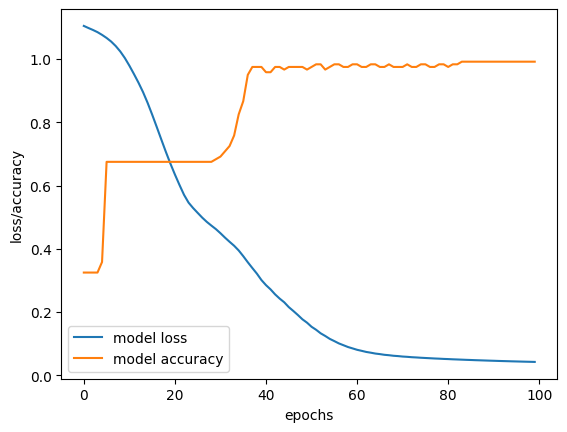

In [28]:
plt.plot(losses, label = 'model loss')
plt.plot(model_accuracy, label='model accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss/accuracy')
plt.show()